<a href="https://colab.research.google.com/github/JhonHendricksBautista/CPE313_Bautista-Jhon/blob/main/Hands_on_Activity_1_2_Training_Neural_Networks_Bautista%2CJhon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 1.2 : Training Neural Networks


Name: Jhon Hendricks Bautista <br>
Section: CPE32S3 <br>
Date: 01/12/2026 <br>
Instructor: Engr Neal Barton James Matira <br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [3]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [4]:

filepath = "/content/drive/MyDrive/datasci3/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [5]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
158,2,88,74,19,53,29.0,0.229,22,0
359,1,196,76,36,249,36.5,0.875,29,1
675,6,195,70,0,0,30.9,0.328,31,1
456,1,135,54,0,0,26.7,0.687,62,0
97,1,71,48,18,76,20.4,0.323,22,0


In [6]:
diabetes_df.dtypes

,0
times_pregnant,int64
glucose_tolerance_test,int64
blood_pressure,int64
skin_thickness,int64
insulin,int64
bmi,float64
pedigree_function,float64
age,int64
has_diabetes,int64


In [7]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [9]:
np.mean(y), np.mean(1-y)

(np.float64(0.3489583333333333), np.float64(0.6510416666666666))

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [10]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [11]:


model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


View the model summary

In [12]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [13]:

model_1 = model.compile(SGD(learning_rate=.003), "binary_crossentropy", metrics=["binary_accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - binary_accuracy: 0.4432 - loss: 0.7680 - val_binary_accuracy: 0.4896 - val_loss: 0.7573
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.4150 - loss: 0.7789 - val_binary_accuracy: 0.4792 - val_loss: 0.7464
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.4441 - loss: 0.7572 - val_binary_accuracy: 0.5156 - val_loss: 0.7364
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.4278 - loss: 0.7776 - val_binary_accuracy: 0.5312 - val_loss: 0.7271
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5083 - loss: 0.7315 - val_binary_accuracy: 0.5469 - val_loss: 0.7186
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5140 - loss: 0.7329 - val_binary_accuracy: 0.5365 - val_loss: 0.7107
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5274 - loss: 0.7058 - val_binary_accuracy: 0.5573 - val_loss: 0.7033
Epoch 8/200


In [14]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_prob_nn_1 = model.predict(X_test_norm)

y_pred_class_nn_1 = (y_pred_prob_nn_1 >= 0.5).astype(int)
print(y_pred_class_nn_1)
print(y_pred_prob_nn_1)
y_pred_prob_nn_1 = y_pred_prob_nn_1.ravel()
y_pred_class_nn_1 = y_pred_class_nn_1.ravel()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]]


In [15]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [16]:
y_pred_prob_nn_1[:10]

array([0.3935939 , 0.5815706 , 0.2559353 , 0.24723983, 0.15829618,
       0.35099542, 0.13373892, 0.29939213, 0.7388253 , 0.33561197],
      dtype=float32)

Create the plot_roc function

In [17]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    plt.show()



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.755
roc-auc is 0.806


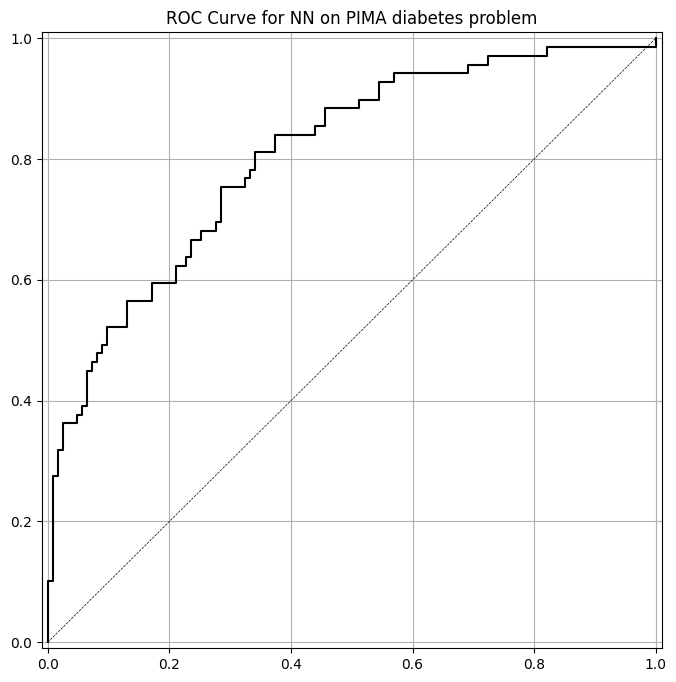

In [18]:

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Based on the ROC curve of the model I can say that the model did fairly good since it was able to create a curve that is nearly hugging the top left side which indicate it can recognize the differences of the data. However this is far from being reliable since its score is only .8 and an auccracy of 75% which shows that the model has some areas in which it has trouble predicting correctly.

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [19]:
run_hist_1.history.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

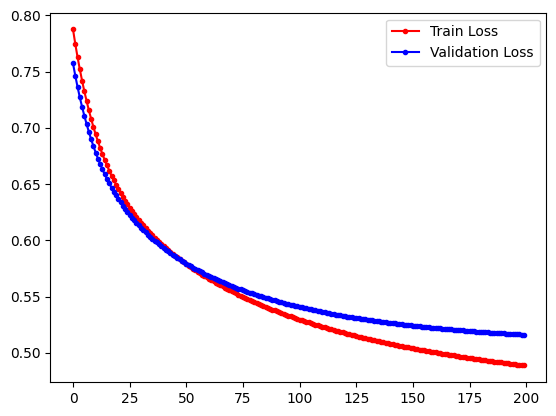

In [20]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.show()

What is your interpretation about the result of the train and validation loss?

based on the plot above we can observe a smooth decline in the training and validation loss. After sometime the difference of the loss between the training and validation becomes big. Around the 100 epoch we can observe the overfitting of the model since as the epoch increase there is a great difference of the loss.

#type your answer here

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [32]:
filepath = "/content/drive/MyDrive/datasci3/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

In [33]:
diabetes_df.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
diabetes_df.isnull().sum()

,0
times_pregnant,0
glucose_tolerance_test,0
blood_pressure,0
skin_thickness,0
insulin,0
bmi,0
pedigree_function,0
age,0
has_diabetes,0


In [27]:
cols = diabetes_df.columns

for i in cols:
  num = diabetes_df[diabetes_df[i] == 0]
  print(num.shape)

(111, 9)
(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)
(0, 9)
(0, 9)
(500, 9)


In [36]:
diabetes_df.shape

(768, 9)

In [37]:
diabetes_df[["glucose_tolerance_test","blood_pressure",
    "skin_thickness","insulin","bmi",'pedigree_function']] = diabetes_df[["glucose_tolerance_test","blood_pressure",
                                                                 "skin_thickness","insulin","bmi",'pedigree_function']].replace(0, np.nan)

In [39]:
diabetes_df.isnull().sum()

,0
times_pregnant,0
glucose_tolerance_test,5
blood_pressure,35
skin_thickness,227
insulin,374
bmi,11
pedigree_function,0
age,0
has_diabetes,0


In [42]:
diabetes_df[["glucose_tolerance_test","blood_pressure"
,"skin_thickness","insulin","bmi",'pedigree_function']] = diabetes_df[["glucose_tolerance_test",
                                                              "blood_pressure","skin_thickness",
                                                              "insulin","bmi",
                                                              'pedigree_function']].fillna(diabetes_df[["glucose_tolerance_test",
                                                                                               "blood_pressure","skin_thickness",
                                                                                               "insulin","bmi",
                                                                                               'pedigree_function']].mean())

In [43]:
cols = diabetes_df.columns

for i in cols:
  num = diabetes_df[diabetes_df[i] == 0]
  print(num.shape)

(111, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(0, 9)
(500, 9)


SPLITTING AND MODELLING

In [73]:
X = diabetes_df.drop(columns=['has_diabetes'])
y = diabetes_df['has_diabetes']

In [74]:
print(y.value_counts())

has_diabetes
0    500
1    268
Name: count, dtype: int64


In [75]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=41)
X_res,y_res = ros.fit_resample(X,y)

In [76]:
print(y_res.value_counts())

has_diabetes
1    500
0    500
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.25, random_state = 0)

SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




In [78]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

checkpoint = EarlyStopping(monitor = 'val_accuracy', patience = 100, mode = 'max', restore_best_weights = True)

input = Input((8,), name = 'Input')

X = Dense(6, activation = 'relu', name = 'd1')(input)
X = Dense(6, activation = 'relu', name = 'd2')(X)

output = Dense(1, activation = "sigmoid", name = 'Output')(X)

model_diab = Model(inputs = input, outputs = output, name = 'diabetestoh')
model_diab.compile(optimizer= "adamax", loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [79]:
my_model= model_diab.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=256, callbacks = [checkpoint])


Epoch 1/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - binary_accuracy: 0.4273 - loss: 0.7536 - val_binary_accuracy: 0.5040 - val_loss: 0.7415
Epoch 2/256


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: binary_accuracy,loss,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - binary_accuracy: 0.4749 - loss: 0.7476 - val_binary_accuracy: 0.5200 - val_loss: 0.7247
Epoch 3/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.4894 - loss: 0.7260 - val_binary_accuracy: 0.5360 - val_loss: 0.7109
Epoch 4/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.5438 - loss: 0.7052 - val_binary_accuracy: 0.5560 - val_loss: 0.6980
Epoch 5/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5340 - loss: 0.7035 - val_binary_accuracy: 0.5800 - val_loss: 0.6857
Epoch 6/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5584 - loss: 0.6981 - val_binary_accuracy: 0.6120 - val_loss: 0.6736
Epoch 7/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5610 - loss: 0.6870 - val_binary_accuracy: 0.6360 - val_loss: 0.6614
Epoch 8/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - binary_accuracy: 0.6023 - loss: 0.6673 - val_binary_accuracy: 0.6640 - val_loss: 0.6502
Epoch 9/256
24/24 ━━━━━━━

In [61]:
y_pred_prob_new = model_diab.predict(x_test)
y_pred_new = (y_pred_prob_new >= 0.5).astype(int)
y_pred_prob_new = y_pred_prob_new.ravel()
y_pred_new = y_pred_new.ravel()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [62]:
y_pred_prob_new[:10]

array([8.2525295e-01, 6.4319229e-01, 7.4729460e-01, 2.6624892e-02,
       3.9914110e-01, 8.9618021e-01, 5.9459015e-04, 8.5450804e-01,
       7.1045685e-01, 4.6687946e-01], dtype=float32)

In [63]:
y_test[:10]

,has_diabetes
993,1
859,1
298,1
553,0
672,0
971,1
27,0
231,1
306,1
706,1


In [64]:
y_pred_new[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.83      0.85      0.84       124

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



Based on the output of the classification report the early iteration of the model is fairly good since it was able to have a decent balance of precision and recall score which means there is no bias. However due to the low accuracy of the model of only having 84% of accuracy this i still not a reliable model

<Axes: >

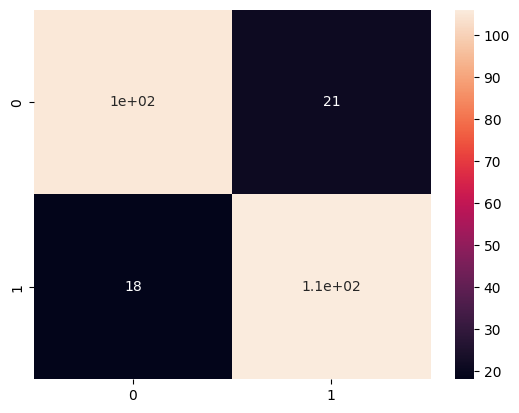

In [66]:
matrix = confusion_matrix(y_test,y_pred_new)

sns.heatmap(matrix, fmt= '.2g', annot = True)

Based on the confusion matrix above we can observe that the model has more mistakes in predicting the false negative. There is also a close number of mistakes of false positive. This reflects why the model only got a 84% accuracy

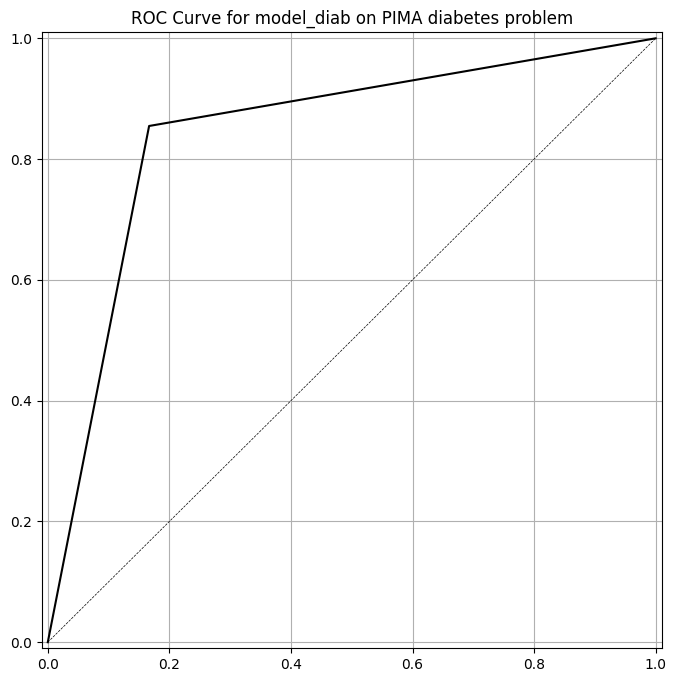

In [67]:
plot_roc(y_test,y_pred_new, 'model_diab')

Based on the ROC curve we can say that the model is fairly good since the curve is close to the top left meaning it was able to recognize the difference of classes.

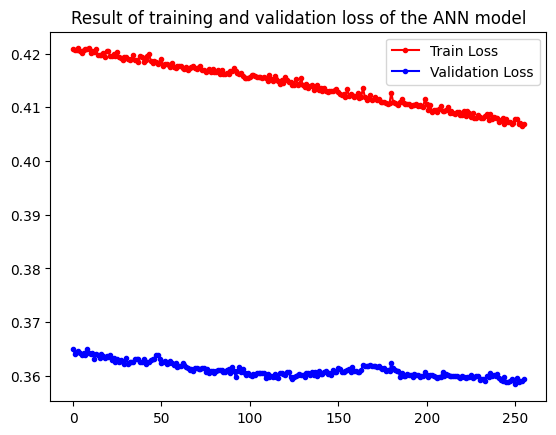

In [72]:
fig, ax = plt.subplots()
ax.plot(my_model.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_model.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss")
plt.show()

In the plot above we can see the difference of the validation and training loss and it has a big difference. There is also no or only small observable decline of the loss in both stages of the model which may indicate that its performance did not improve over the 250 epochs.

New Model

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.25, random_state = 0)

SS = StandardScaler()

x_train = SS.fit_transform(x_train)
x_test = SS.fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 8)
(250, 8)
(750,)
(250,)


In [105]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

checkpoint = EarlyStopping(monitor = 'val_accuracy', patience = 100, mode = 'max', restore_best_weights = True)

input = Input((8,), name = 'Input')

X = Dense(64, activation = 'relu', name = 'd1')(input)
X = Dropout(0.2)(X)
X = Dense(64, activation = 'relu', name = 'd2')(X)
X = Dropout(0.1)(X)
X = Dense(32, activation = 'relu', name = 'd3')(X)
X = Dense(16, activation = 'relu', name = 'd4')(X)

output = Dense(1, activation = "sigmoid", name = 'Output')(X)

model_diab = Model(inputs = input, outputs = output, name = 'diabetestoh')
model_diab.compile(optimizer= "adam", loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123 (496.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [106]:
my_model= model_diab.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=256, callbacks = [checkpoint])

Epoch 1/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - binary_accuracy: 0.6087 - loss: 0.6654 - val_binary_accuracy: 0.8000 - val_loss: 0.5591
Epoch 2/256


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: binary_accuracy,loss,val_binary_accuracy,val_loss
  current = self.get_monitor_value(logs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - binary_accuracy: 0.7122 - loss: 0.5740 - val_binary_accuracy: 0.8080 - val_loss: 0.4556
Epoch 3/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7316 - loss: 0.5249 - val_binary_accuracy: 0.8160 - val_loss: 0.4351
Epoch 4/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7290 - loss: 0.5164 - val_binary_accuracy: 0.8240 - val_loss: 0.4291
Epoch 5/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7430 - loss: 0.5035 - val_binary_accuracy: 0.8160 - val_loss: 0.4233
Epoch 6/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7843 - loss: 0.4617 - val_binary_accuracy: 0.8360 - val_loss: 0.4192
Epoch 7/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7553 - loss: 0.5066 - val_binary_accuracy: 0.8240 - val_loss: 0.4094
Epoch 8/256
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.7572 - loss: 0.4909 - val_binary_accuracy: 0.8320 - val_loss: 0.4068
Epoch 9/256
24/24 ━━━━━━━

In [98]:
y_pred_prob_new = model_diab.predict(x_test)
y_pred_new = (y_pred_prob_new >= 0.5).astype(int)
y_pred_prob_new = y_pred_prob_new.ravel()
y_pred_new = y_pred_new.ravel()

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [99]:
y_pred_prob_new[:10]

array([1.0000000e+00, 9.9999940e-01, 9.9957722e-01, 4.0558064e-09,
       1.8691894e-20, 1.0000000e+00, 3.5281702e-17, 1.0000000e+00,
       1.8533744e-06, 1.9250517e-06], dtype=float32)

In [100]:
y_test[:10]

y_pred_new[:10]

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       126
           1       0.86      0.93      0.89       124

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



Based on the results of the classification report the model has improved but still has errors since its increased in performance is only small and not able to reach 95% accuracy.

<Axes: >

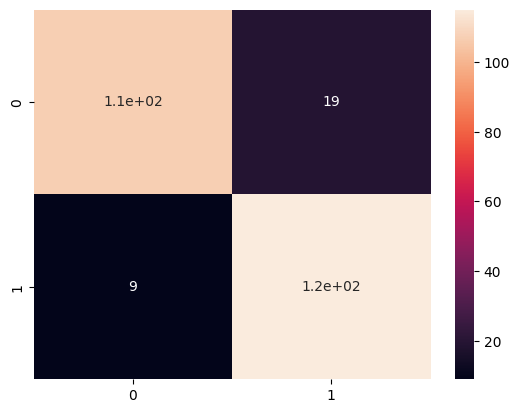

In [102]:
matrix = confusion_matrix(y_test,y_pred_new)

sns.heatmap(matrix, fmt= '.2g', annot = True)

Based on the confusion matrix the model is still not able to properly predict the class 0 and having false negatives even after creating more layers.

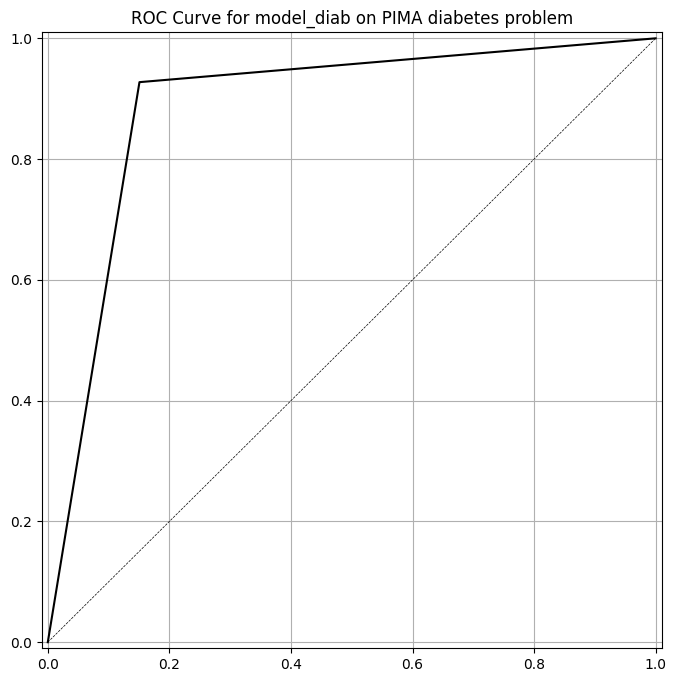

In [103]:
plot_roc(y_test,y_pred_new, 'model_diab')

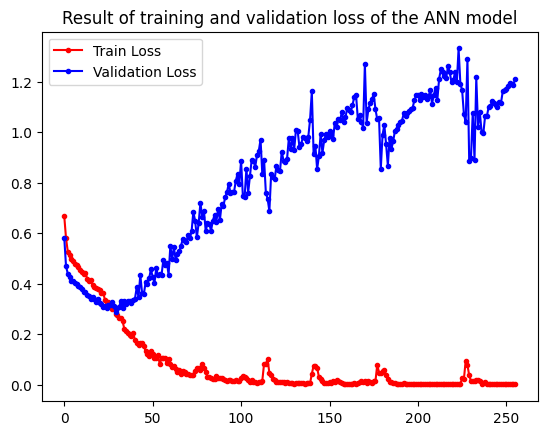

In [104]:
fig, ax = plt.subplots()
ax.plot(my_model.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(my_model.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
ax.set(title=f"Result of training and validation loss of the ANN model")
plt.show()

Based on the result of the plot of loss in training and validation we can see in the early epoch there is both a decrease of the loss. After 50 epochs there we can observe the model overfit greatly since the training continously decrease while the validation loss increases. This shows a great overfit in the model

#### Conclusion

After accomplishing this activity I was able to use neural networks in a real world data set. Through this acitvity I learn how to build the structure of a neural network in the sequential function and apply different combinations of layers and neurons. I was able to create a neural network and tests its performance. The model created as overfitting since it revealed in the loss comparison of training and valdiation, the two lines were not meeting and the training loss contiously decrease while the other increases. Due to this the model can still be improve by exploring other layer combinations and optimizers.